# Poslovna inteligencija - projektni rad
Hajrija Bajrić, II-73

In [3]:
import pandas as pd 
import numpy as np 

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import plotly.offline as py 
py.init_notebook_mode(connected=True) 
import plotly.graph_objs as go 
import plotly.tools as tls 
import warnings 
from collections import Counter

Učitavanje seta podataka

In [4]:
podaci = pd.read_csv("avio_kompanija.csv")

Pregled seta podataka

In [5]:
print(podaci)

         spol       tip_putnika  godine     vrsta_putovanja      klasa  \
0      zensko    Lojalan putnik      52  Poslovno putovanje  Ekonomska   
1      zensko    Lojalan putnik      36  Poslovno putovanje   Poslovna   
2       musko  Nelojalan putnik      20  Poslovno putovanje  Ekonomska   
3       musko    Lojalan putnik      44  Poslovno putovanje   Poslovna   
4      zensko    Lojalan putnik      49  Poslovno putovanje  Ekonomska   
...       ...               ...     ...                 ...        ...   
25971   musko  Nelojalan putnik      34  Poslovno putovanje   Poslovna   
25972   musko    Lojalan putnik      23  Poslovno putovanje   Poslovna   
25973  zensko    Lojalan putnik      17     Licno putovanje  Ekonomska   
25974   musko    Lojalan putnik      14  Poslovno putovanje   Poslovna   
25975  zensko    Lojalan putnik      42     Licno putovanje  Ekonomska   

       udaljenost_leta  vrijeme_odlaska_dolaska  kasnjenje_polaska_u_minutama  \
0                  160        

Pregled osnovnih podataka u setu podataka

In [6]:
podaci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spol                          25976 non-null  object 
 1   tip_putnika                   25976 non-null  object 
 2   godine                        25976 non-null  int64  
 3   vrsta_putovanja               25976 non-null  object 
 4   klasa                         25976 non-null  object 
 5   udaljenost_leta               25976 non-null  int64  
 6   vrijeme_odlaska_dolaska       25976 non-null  int64  
 7   kasnjenje_polaska_u_minutama  25976 non-null  int64  
 8   kasnjenje_dolaska_u_minutama  25893 non-null  float64
 9   zadovoljstvo_putnika          25976 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 2.0+ MB


Text(0.5, 1.0, 'Raspodjela putnika')

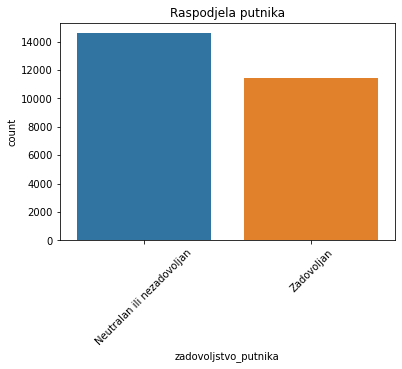

In [7]:
#Prikaz grafika raspoređenosti kategorija klasa u datasetu
import seaborn as sns
plot = sns.countplot(x="zadovoljstvo_putnika", data=podaci, order=podaci.zadovoljstvo_putnika.value_counts().index)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
plot.set_title("Raspodjela putnika")

Pregled prvih nekoliko redova u setu podataka

In [8]:
podaci.head(10)

,spol,tip_putnika,godine,vrsta_putovanja,klasa,udaljenost_leta,vrijeme_odlaska_dolaska,kasnjenje_polaska_u_minutama,kasnjenje_dolaska_u_minutama,zadovoljstvo_putnika
0,zensko,Lojalan putnik,52,Poslovno putovanje,Ekonomska,160,4,50,44.0,Zadovoljan
1,zensko,Lojalan putnik,36,Poslovno putovanje,Poslovna,2863,1,0,0.0,Zadovoljan
2,musko,Nelojalan putnik,20,Poslovno putovanje,Ekonomska,192,0,0,0.0,Neutralan ili nezadovoljan
3,musko,Lojalan putnik,44,Poslovno putovanje,Poslovna,3377,0,0,6.0,Zadovoljan
4,zensko,Lojalan putnik,49,Poslovno putovanje,Ekonomska,1182,3,0,20.0,Zadovoljan
5,musko,Lojalan putnik,16,Poslovno putovanje,Ekonomska,311,3,0,0.0,Zadovoljan
6,zensko,Lojalan putnik,77,Poslovno putovanje,Poslovna,3987,5,0,0.0,Zadovoljan
7,zensko,Lojalan putnik,43,Poslovno putovanje,Poslovna,2556,2,77,65.0,Zadovoljan
8,musko,Lojalan putnik,47,Poslovno putovanje,Ekonomska,556,2,1,0.0,Zadovoljan
9,zensko,Lojalan putnik,46,Poslovno putovanje,Poslovna,1744,2,28,14.0,Zadovoljan


Pregled statističkih podataka unutar seta podataka

In [9]:
podaci.describe()

,godine,udaljenost_leta,vrijeme_odlaska_dolaska,kasnjenje_polaska_u_minutama,kasnjenje_dolaska_u_minutama
count,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,39.620958,1193.788459,3.046812,14.30609,14.740857
std,15.135685,998.683999,1.533371,37.42316,37.517539
min,7.000000,31.000000,0.000000,0.00000,0.000000
25%,27.000000,414.000000,2.000000,0.00000,0.000000
50%,40.000000,849.000000,3.000000,0.00000,0.000000
75%,51.000000,1744.000000,4.000000,12.00000,13.000000
max,85.000000,4983.000000,5.000000,1128.00000,1115.000000


Text(0.5, 1.0, 'Vrsta putovanja')

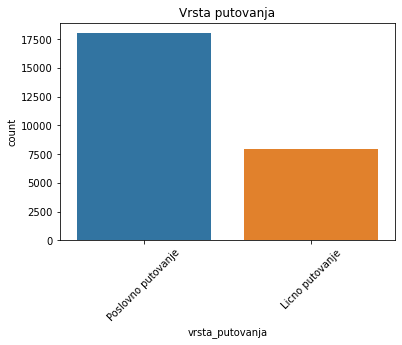

In [10]:
#Prikaz grafika raspoređenosti kategorija klasa u datasetu
import seaborn as sns
plot = sns.countplot(x="vrsta_putovanja", data=podaci, order=podaci.vrsta_putovanja.value_counts().index)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
plot.set_title("Vrsta putovanja")

In [11]:
podaci.nunique()

spol                               2
tip_putnika                        2
godine                            75
vrsta_putovanja                    2
klasa                              3
udaljenost_leta                 3281
vrijeme_odlaska_dolaska            6
kasnjenje_polaska_u_minutama     313
kasnjenje_dolaska_u_minutama     320
zadovoljstvo_putnika               2
dtype: int64

In [12]:
#Prikaz svih kategorija klasa
podaci.klasa.unique()

array(['Ekonomska', 'Poslovna', 'Ekonomska Plus'], dtype=object)

Text(0.5, 1.0, 'Raspodjela klasa prema kategoriji')

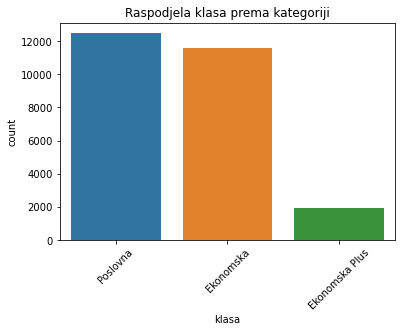

In [13]:
#Prikaz grafika raspoređenosti kategorija klasa u datasetu
import seaborn as sns
plot = sns.countplot(x="klasa", data=podaci, order=podaci.klasa.value_counts().index)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
plot.set_title("Raspodjela klasa prema kategoriji")

In [14]:
podaci.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
25971    False
25972    False
25973    False
25974    False
25975    False
Length: 25976, dtype: bool

In [15]:
podaci.drop_duplicates(inplace=True)

In [16]:
podaci.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25941 entries, 0 to 25975
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spol                          25941 non-null  object 
 1   tip_putnika                   25941 non-null  object 
 2   godine                        25941 non-null  int64  
 3   vrsta_putovanja               25941 non-null  object 
 4   klasa                         25941 non-null  object 
 5   udaljenost_leta               25941 non-null  int64  
 6   vrijeme_odlaska_dolaska       25941 non-null  int64  
 7   kasnjenje_polaska_u_minutama  25941 non-null  int64  
 8   kasnjenje_dolaska_u_minutama  25858 non-null  float64
 9   zadovoljstvo_putnika          25941 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 2.2+ MB


In [17]:
#Ispitivanje nedostajućih vrijednosti
podaci.isnull()
#Sumiranje nedostajućih vrijednosti po kolonama
podaci.isnull().sum()

spol                             0
tip_putnika                      0
godine                           0
vrsta_putovanja                  0
klasa                            0
udaljenost_leta                  0
vrijeme_odlaska_dolaska          0
kasnjenje_polaska_u_minutama     0
kasnjenje_dolaska_u_minutama    83
zadovoljstvo_putnika             0
dtype: int64

In [18]:
#Podjela dataset-a na nezavisne vrijednosti i ciljnu vrijednost
X = podaci[['spol', 'tip_putnika', 'godine', 'vrsta_putovanja', 'klasa', 'udaljenost_leta', 'vrijeme_odlaska_dolaska', 'kasnjenje_polaska_u_minutama', 'kasnjenje_dolaska_u_minutama']].values
y = podaci['zadovoljstvo_putnika'].values
X

array([['zensko', 'Lojalan putnik', 52, ..., 4, 50, 44.0],
       ['zensko', 'Lojalan putnik', 36, ..., 1, 0, 0.0],
       ['musko', 'Nelojalan putnik', 20, ..., 0, 0, 0.0],
       ...,
       ['zensko', 'Lojalan putnik', 17, ..., 5, 0, 0.0],
       ['musko', 'Lojalan putnik', 14, ..., 3, 0, 0.0],
       ['zensko', 'Lojalan putnik', 42, ..., 5, 0, 0.0]], dtype=object)

In [19]:
from sklearn.impute import SimpleImputer
# korištenje SimpleImputer klase za popunjavanje nedostajućih vrijednosti za kašnjenje dolaska u minutama
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 8:9])
X[:, 8:9] = imputer.transform(X[:, 8:9])

In [20]:
# Kodiranje vrijednosti spola i tipa putnika
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 0] = le.fit_transform(X[:, 0])
X[:, 0]

le = LabelEncoder()
X[:, 1] = le.fit_transform(X[:, 1])
X[:, 1]

array([0, 0, 1, ..., 0, 0, 0], dtype=object)

In [21]:
# Obrada kategoričkih (deskriptivnih) podataka za klasu i vrstu putovanja
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3,4])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

X

array([[0.0, 1.0, 1.0, ..., 4, 50, 44.0],
       [0.0, 1.0, 0.0, ..., 1, 0, 0.0],
       [0.0, 1.0, 1.0, ..., 0, 0, 0.0],
       ...,
       [1.0, 0.0, 1.0, ..., 5, 0, 0.0],
       [0.0, 1.0, 0.0, ..., 3, 0, 0.0],
       [1.0, 0.0, 1.0, ..., 5, 0, 0.0]], dtype=object)

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[1 1 0 ... 0 1 0]


In [23]:
# Rastavljanje data set-a na set podataka za trening i set podataka za test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [24]:
X_train


array([[0.0, 1.0, 0.0, ..., 5, 158, 150.0],
       [0.0, 1.0, 1.0, ..., 4, 51, 59.0],
       [0.0, 1.0, 1.0, ..., 3, 0, 0.0],
       ...,
       [0.0, 1.0, 1.0, ..., 4, 0, 0.0],
       [1.0, 0.0, 1.0, ..., 4, 0, 0.0],
       [1.0, 0.0, 1.0, ..., 4, 34, 15.0]], dtype=object)

In [25]:
X_test

array([[0.0, 1.0, 0.0, ..., 0, 0, 0.0],
       [0.0, 1.0, 0.0, ..., 3, 2, 1.0],
       [0.0, 1.0, 0.0, ..., 1, 0, 0.0],
       ...,
       [0.0, 1.0, 0.0, ..., 0, 0, 12.0],
       [0.0, 1.0, 0.0, ..., 2, 0, 0.0],
       [1.0, 0.0, 1.0, ..., 5, 0, 6.0]], dtype=object)

In [26]:
y_train

array([1, 0, 1, ..., 1, 0, 0])

In [27]:
y_test

array([1, 1, 1, ..., 1, 0, 0])

In [28]:
# Skaliranje vrijednosti godina
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 2:3] = sc.fit_transform(X_train[:, 2:3])

X_test[:, 2:3] = sc.transform(X_test[:, 2:3])
X_test

array([[0.0, 1.0, -0.8945920632667881, ..., 0, 0, 0.0],
       [0.0, 1.0, -0.8945920632667881, ..., 3, 2, 1.0],
       [0.0, 1.0, -0.8945920632667881, ..., 1, 0, 0.0],
       ...,
       [0.0, 1.0, -0.8945920632667881, ..., 0, 0, 12.0],
       [0.0, 1.0, -0.8945920632667881, ..., 2, 0, 0.0],
       [1.0, 0.0, 1.1178279363985113, ..., 5, 0, 6.0]], dtype=object)

In [30]:
clf = DecisionTreeClassifier()

#Treniranje klasifikatora
clf = clf.fit(X_train,y_train)

#Predviđanje rezultata na testnim podacima
y_pred = clf.predict(X_test)

# Tačnost modela stabla odlučivanja
from sklearn.metrics import accuracy_score, recall_score, precision_score
decision_tree_tacnost = accuracy_score(y_test, y_pred)
print("Tačnost: " +  str(decision_tree_tacnost))


Tačnost: 0.7222971670842167


In [31]:
#Kreiranje Logistic Regression klasifikatora
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

#Treniranje klasifikatora
model.fit(X_train, y_train)

#Predviđanje rezultata na testnim podacima
y_pred = model.predict(X_test)

# Tačnost modela logistic regression
from sklearn.metrics import accuracy_score, recall_score, precision_score
logistic_tacnost = accuracy_score(y_test, y_pred)
print("Tačnost: " +  str(logistic_tacnost))


Tačnost: 0.7702832915783387


C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Tačnost Naivne Bayes klasifikatora: 0.7635382539988437


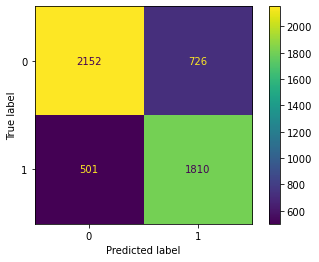

In [35]:
#Kreiranje Naive Bayes klasifikatora
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

#Treniranje klasifikatora
model.fit(X_train, y_train)
  
#Predviđanje rezultata na testnim podacima
y_pred = model.predict(X_test)

# Tačnost modela Naive Bayes
from sklearn.metrics import accuracy_score, recall_score, precision_score
naive_tacnost = accuracy_score(y_test, y_pred)
print("Tačnost Naivne Bayes klasifikatora: " +  str(naive_tacnost))
plot_confusion_matrix(model, X_test, y_test)

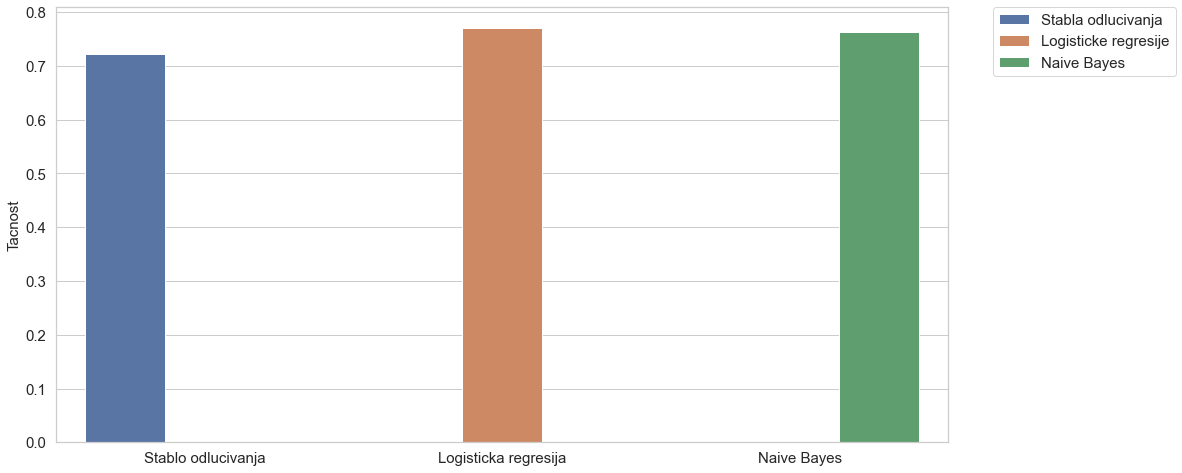

In [36]:
import matplotlib.pyplot as plt
tacnost = pd.DataFrame({'classifier':['Stablo odlucivanja','Logisticka regresija', 'Naive Bayes'],
                           'data_set':['Stabla odlucivanja', 'Logisticke regresije', 'Naive Bayes'],
                          'accuracy':[decision_tree_tacnost, logistic_tacnost, naive_tacnost]
                          })
sns.set(style="whitegrid")
plt.figure(figsize=(16, 8))
ax = sns.barplot(x = 'classifier', y = 'accuracy', hue = 'data_set', data = tacnost)
ax.set_xlabel('', fontsize = 15)
ax.set_ylabel('Tacnost', fontsize = 15)
ax.tick_params(labelsize = 15)
#Odvajanje legende od grafika
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0., fontsize = 15)
plt.show()